- seaborn  
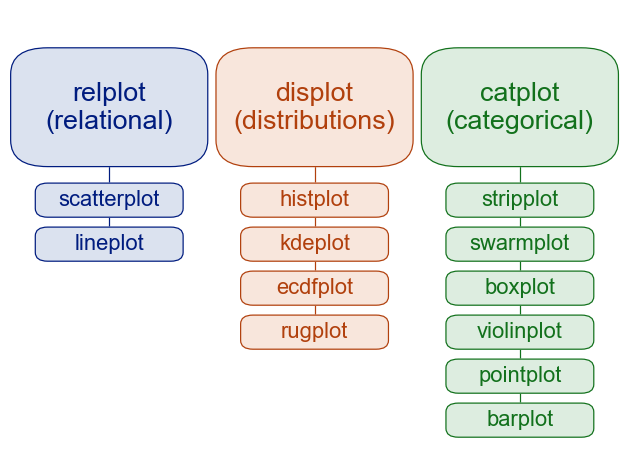

In [11]:
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd #pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt #Matplotlib(맷플롯립) 패키지의 pyplot 모듈을 plt로 임포트
import seaborn as sns #Seaborn(씨본) 패키지 임포트
import scipy

from matplotlib import rcParams # 한글 환경 설정을 위한 rcParams 임포트

#한글 환경 설정. #할 때마다 실행을 해줘야 함. 
#항상 되는것은 아님(어떨때는 안될때도 있음)
def setting_styles_basic():
    rcParams['font.family'] = 'Malgun Gothic' #windows
    # rcParams['font.family'] = 'AppleGothic' #Mac
    rcParams['axes.unicode_minus'] = 'False' #한글 폰트 사용시, 마이너스 기호가 깨지는 현상 방지.

setting_styles_basic()

#경고창 무시
import warnings
warnings.filterwarnings('ignore')

- 한글폰트 설정. 실행 후 -> 런타임 다시 시작.
  - !sudo apt-get install -y fonts-nanum  
!sudo fc-cache -fv  
!rm ~/.cache/patplotlib -rf  
!fc~cache: succeeded

In [12]:
import matplotlib.pyplot as plt # 맷플롯립 import
plt.rcParams['font.famliy'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

KeyError: 'font.famliy is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

- 스케일 조정 - > sns.set_context 함수를 이용해 설정이 가능

In [13]:
sns.set_context('paper', # notebook, talk, poster
                rc={'font.size':15, 
                    'xtick.labelsize':15, 
                    'ytick.labelsize':15, 
                    'axes.labelsize':15})

- pip install scikit-learn 

In [14]:
df_titanic = sns.load_dataset('titanic')    # 타이타닉호 데이터
df_iris = sns.load_dataset('iris')          # 붓꽃 데이터
df_penguins = sns.load_dataset('penguins')  # 펭귄 데이터
df_tips = sns.load_dataset('tips')          # 팁 데이터
df_diamonds = sns.load_dataset('diamonds')  # 다이아몬드 데이터
df_planets = sns.load_dataset('planets')    # 행성 데이터
df_flights = sns.load_dataset('flights')    # 비행 데이터

from sklearn.datasets import load_wine      
wine_data = load_wine()
df_wines = pd.DataFrame(data=wine_data.data, # 와인 데이터
                       columns=wine_data.feature_names)

In [15]:
type(wine_data)

sklearn.utils._bunch.Bunch

- 다변량 데이터 : 변랑이 2개인 이변량 데이터와 변량이 3개 이상인 데이터를 포함함
- 다변랑 데이터를 그래프로 표현할 때는 색상으로 구분하는 hue,  
캔버스로 구분하는 col, 점크기로 구분하는 size 등의 파라미터를  
이용해 시각화 차원을 넓혀나갈 수 있음

- 다차원 데이터 시각화 : 범주형  
1) 병렬 막대 그래프  
- 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(Canvas)에 병령로 나열한 나열한 그래프.
    - 병렬 빈도 막대그래프를 그리려면 sns.catplot 함수에 kind='count'와 col 옵션을 추가하면 됨.  
sns.count 함수로는 병렬 막대그래프를 그릴 수 없음.

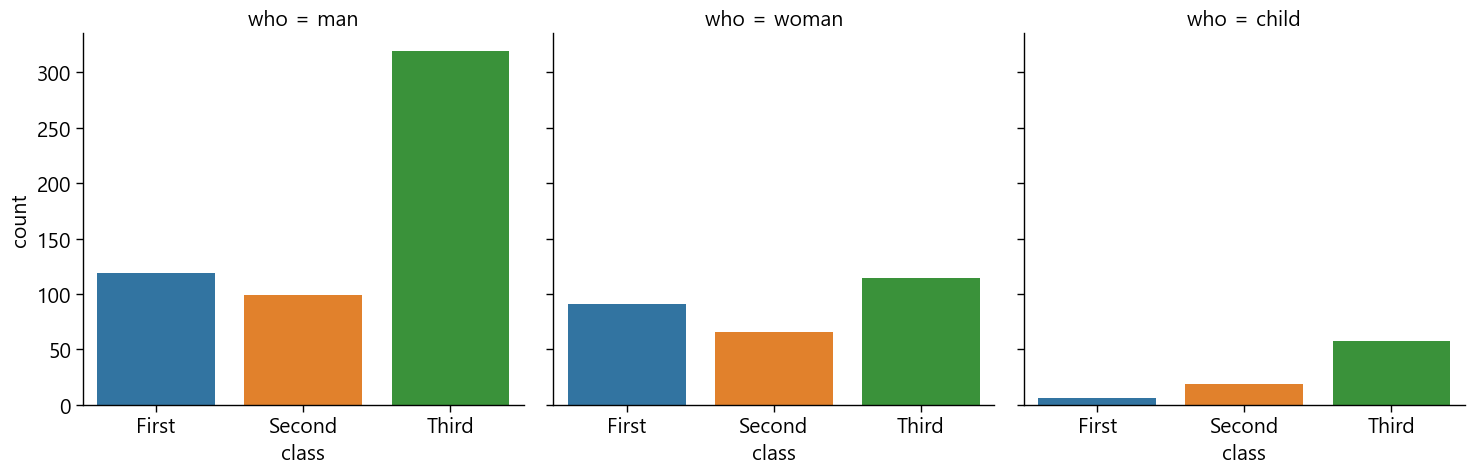

In [16]:
sns.catplot(x='class',
            col = 'who', #캔버스 분리하기
            kind ='count',#빈도 막대그래프 그리기
            data = df_titanic) 

2) 다중 막대그래프
   - 다중 막대그래프는 sns.countplot() 또는 sns.catplot()에 hue 파라미터를 설정해서 그릴 수 있음. hue옵션은 변량을 색상으로 구분하는 파라미터.

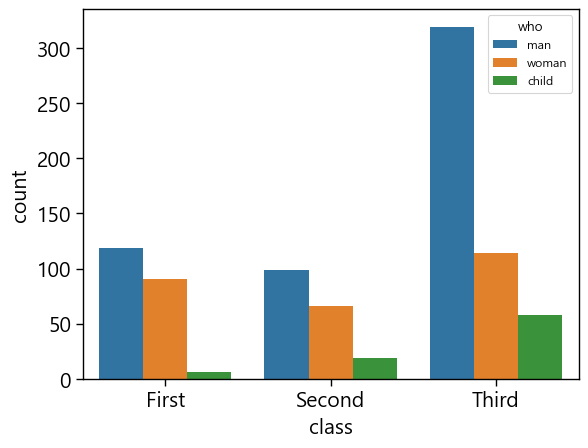

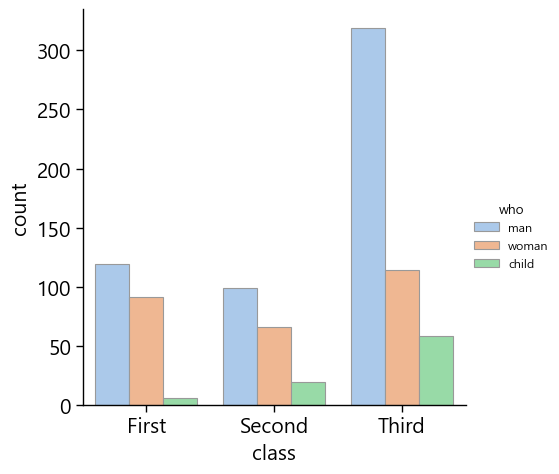

In [17]:
sns.countplot(x='class',hue='who',data=df_titanic)

# 또는
sns.catplot(x='class', hue='who',kind='count',
            palette = 'pastel',#색상 팔레트 지정 : 'man':b, woman:'g, chile:'r'
            edgecolor='.6', #막대 테두리 색상 투명도 지정.
            data = df_titanic)

- sns.histplot 함수에 multiple='dodge' 옵션을 주어도 다중 막대그래프를 그릴 수 있습니다.  
sns.histplot 함수는 수치형 자료를 히스토그램으로 만들 때 사용하는 함수이지만,  
히스토그램의 막대 사이에 간격을 주고 x축 눈금을 없애면 히스토그램을 일반 막대그래프처럼 만들 수 있습니다.

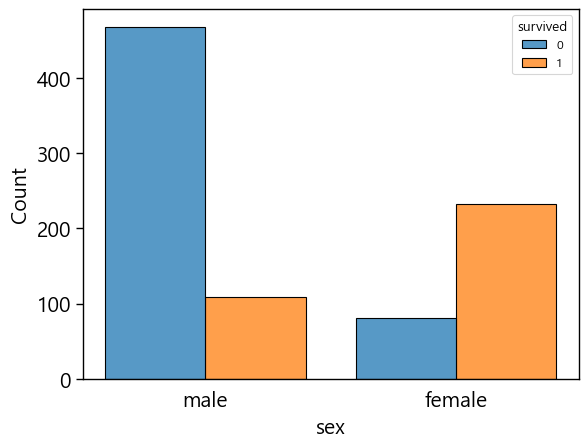

In [18]:
ax=sns.histplot(x='sex', hue='survived', 
                multiple = 'dodge', # 다중 막대그래프 그리기 
                shrink=.8, # 막대 사이 간격 조정
                data= df_titanic)
ax.tick_params(bottom=False)  # X 축 눈금 숨기기

- 수평 다중 막대그래프
  - 수평 다중 막대그래프를 그리고 싶다면 수직 다중 막대그래프를 그릴 때 사용한 함수에 x파라미터 대신 y파라미터를 사용

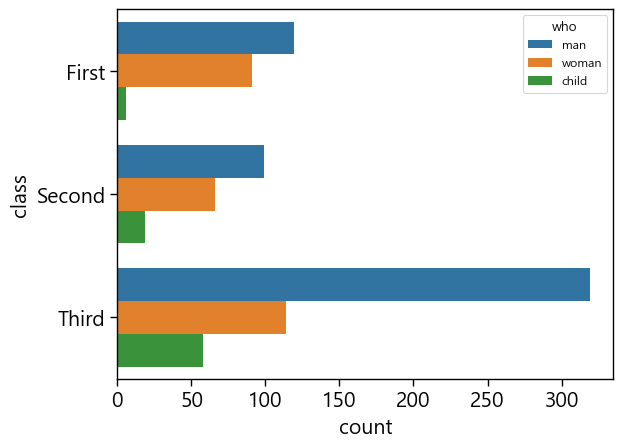

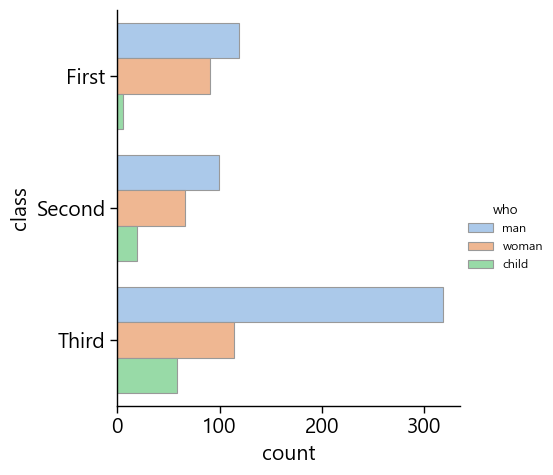

In [19]:
sns.countplot(y='class', hue='who', data=df_titanic)
#또는
sns.catplot(y='class', hue='who', kind='count',
            palette = 'pastel', edgecolor='.6',
            data= df_titanic)

3) 누적 막대그래프
    - Seaborn으로 누적 막대그래프를 만들려면 sns.hitplot 함수에 multiple='stack' 옵션을 주면 됩니다. 

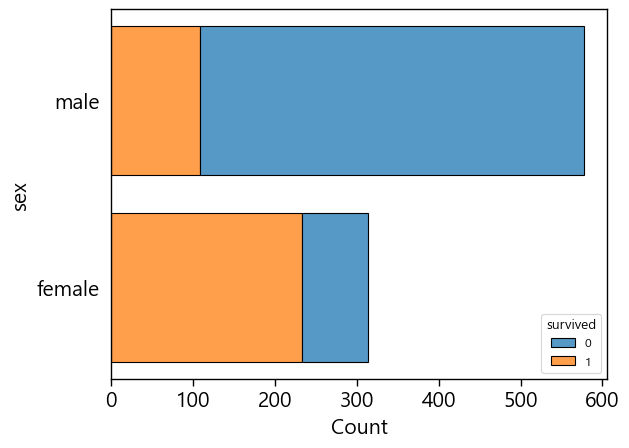

In [20]:
ax=sns.histplot(y='sex', hue='survived', 
                multiple = 'stack', # 다중 막대그래프 그리기 
                shrink=.8, # 막대 사이 간격 조정
                data= df_titanic)
ax.tick_params(left=False)  # X 축 눈금 숨기기

- 단순 수평 누적 막대그래프
  - 수평 누 적 막대그래프를 그리려면 x파라미터 대신 y파라미터를 사용

지금까지 다중 막대그래프와 누적 막대그래프를 이변량 변주형 데이터를 시각화 하는 법을 알아보았습니다.


In [21]:
!pip install statsmodels

Text(0.5, 1.0, '타이타닉호 성별 생존자')

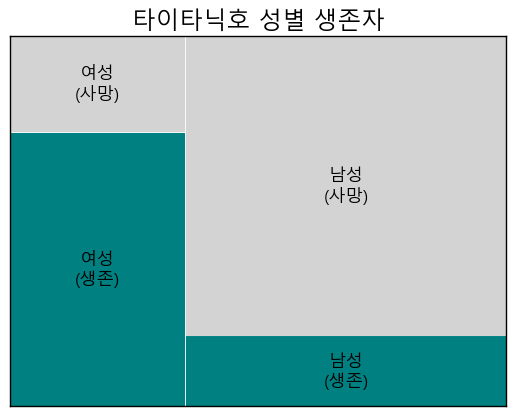

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

props = lambda key: {'color': 'teal' if '1' in key else 'lightgray'}
labelizer = lambda k: {('female','1'): '여성\n(생존)', ('female','0'): '여성\n(사망)',
                        ('male','1'): '남성\n(생존)', ('male', '0'): '남성\n(사망)'}[k]

mosaic(df_titanic.sort_values('sex'), 
       ['sex', 'survived'], 
       properties=props, # 색상 변경
       labelizer=labelizer, # 라벨 변경
       axes_label=False) # 축 라벨 숨기기
plt.title('타이타닉호 성별 생존자', fontsize=17) # 제목 내용 및 글자 크기 설정

- 다차원 데이터 시각화 : 수치형
    1) 점 그래프
        - 점 그래프는 데이터 포인트를 점으로 나타난 도표
        - 점 그래프를 이용하면 데이터의 실제 위치와 분포를 한눈에 파악할 수 있음
        - Seabor에서 점 그래프를 그리는 기본 함수는 sns.stripplot

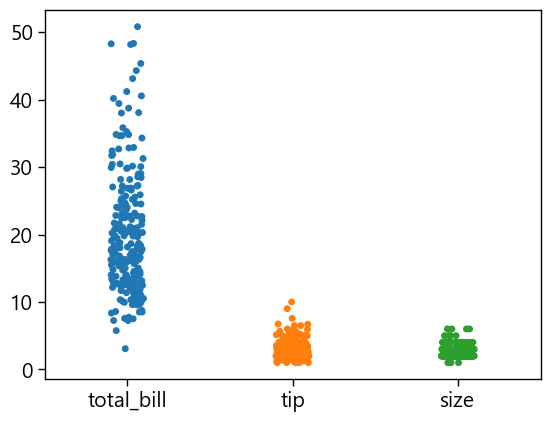

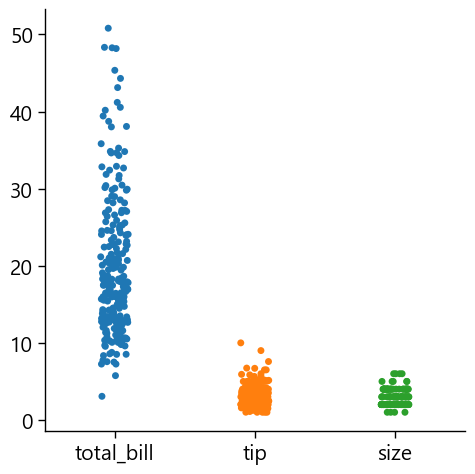

In [23]:
sns.stripplot(data=df_tips)
# 또는
sns.catplot(kind='strip', data=df_tips)

- sns.stripplot 함수에 jitter 옵션을 추가하면 데이터포인트를 일렬로 그릴 수 있습니다.
    - jitter: 지터(jitter)는 데이터 값에 약간의 노이즈를 추가하는 것,  
노이즈를 추가하면 데이터 값이 조금씩 움직여서 같은 값을 가지는 데이터가 그래프에 여러번 겹쳐서 표시되는 현상을 막아줌

<Axes: xlabel='total_bill', ylabel='smoker'>

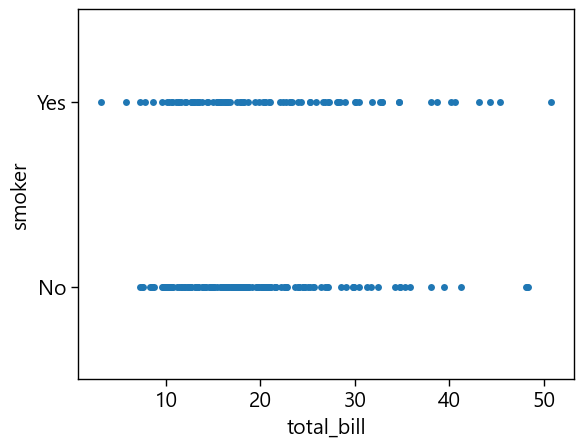

In [24]:
sns.stripplot(x='total_bill', y='smoker', 
              jitter = False, 
              data=df_tips)

<Axes: xlabel='total_bill', ylabel='smoker'>

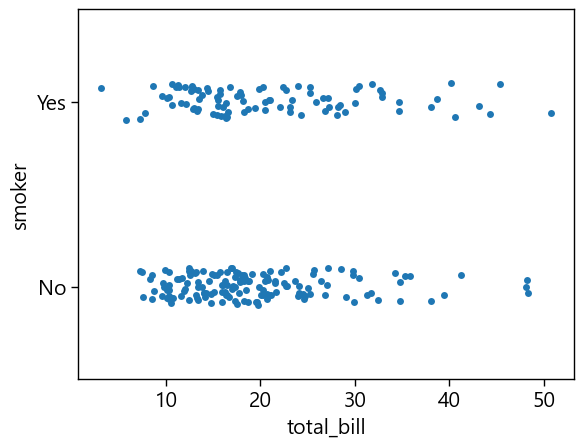

In [25]:
sns.stripplot(x='total_bill', y='smoker', 
              jitter = True, 
              data=df_tips)

- 데이터포인트가 서로 겹치는 것을 방지 하려면 dodge = True 옵션을 사용
    - dodge = True:hue로 구분된 그룹 사이 간격을 만들어 데이터가 겹치는 것을 방지

<Axes: xlabel='tip', ylabel='day'>

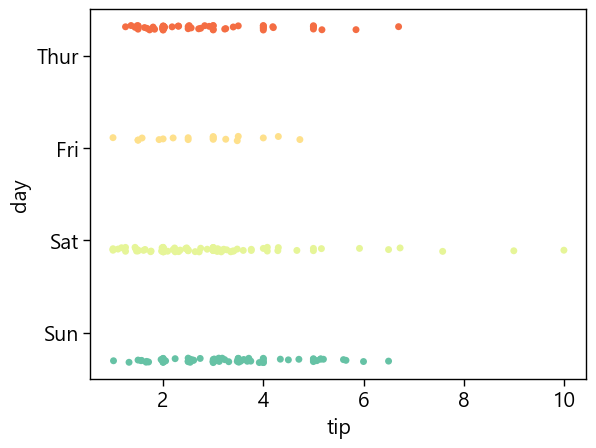

In [26]:
sns.stripplot(x='tip',y='day',
              palette = 'Spectral', #색상 팔레트 지정
              dodge = True,
              data = df_tips) 

<Axes: xlabel='tip', ylabel='day'>

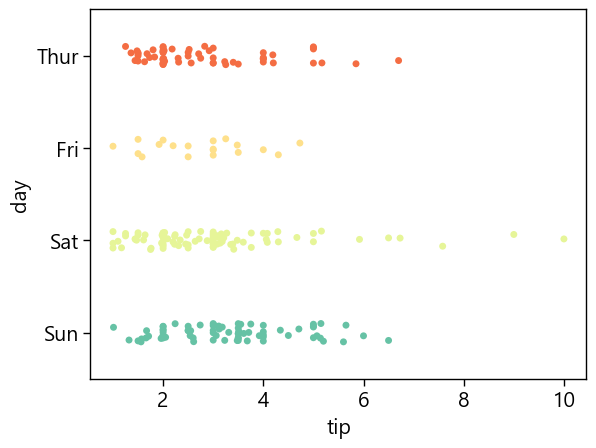

In [27]:
sns.stripplot(x='tip',y='day',
              palette = 'Spectral', #색상 팔레트 지정
              dodge = False,
              data = df_tips) 

- swarmplot
  - swarmplot 함수를 이용하면 점도표의 데이터포인트를 떼(swarm)처럼 무리를 만들어 데이터포인트가 중첩되는 문제를 해결할 수 있음.  
떼 플롯을 그리는 기본 코드는 다음과 같습니다.

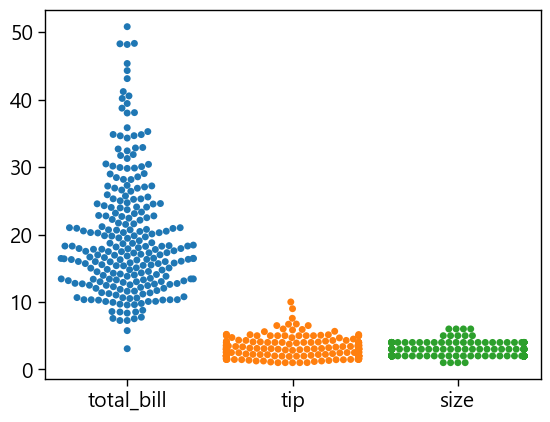

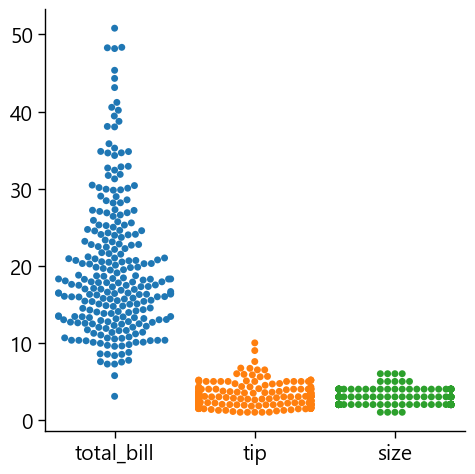

In [28]:
sns.swarmplot(data=df_tips)
#또는
sns.catplot(kind='swarm', data=df_tips)

- x와 y 파라미터를 사용하면 각 변수에 대한 떼 플롯을 만들 수 있습니다.

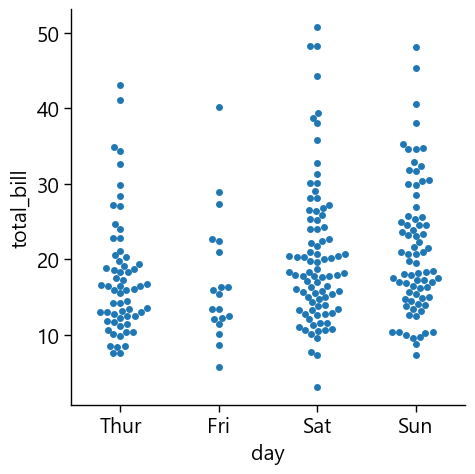

In [29]:
# sns.swarmplot(x='day', y='total_bill', data=df_tips)
# #또는
sns.catplot(x='day', y='total_bill', kind='swarm', data=df_tips)

2) 선분 그래프
    - 실수 데이터의 분포를 선분으로 표현하고 싶다면 sns.rugplot 함수를 이용하면 됩니다. sns.rugplot은 데이터포인트를 각 축 위에 보여줍니다.

<Axes: xlabel='total_bill', ylabel='tip'>

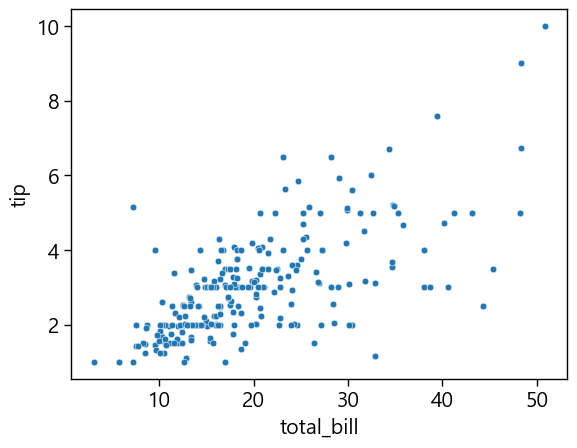

In [30]:
tips= sns.load_dataset("tips")
sns.scatterplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

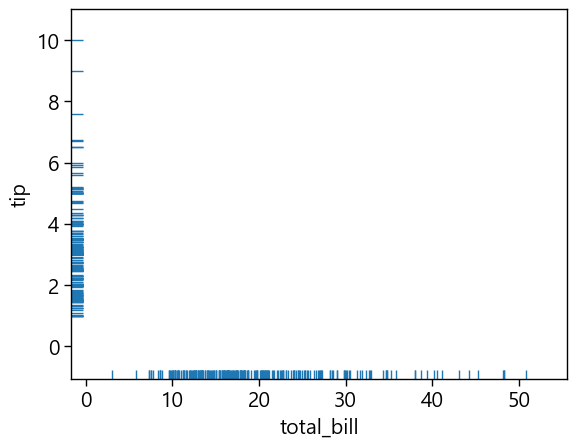

In [31]:
tips= sns.load_dataset("tips")
sns.rugplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

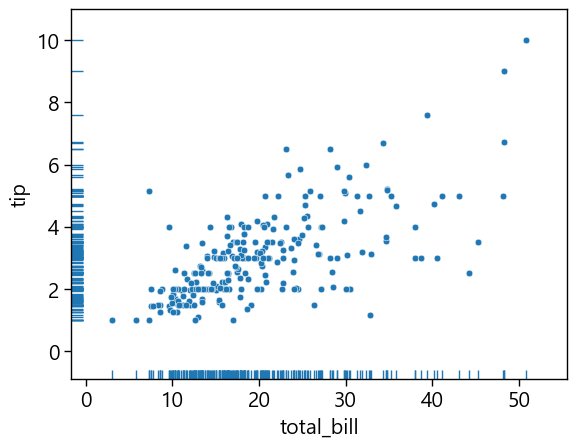

In [32]:
tips= sns.load_dataset("tips")
sns.scatterplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

3) 요약 통계값 막대그래프  
요약 통계값 막대그래프는 범주로 구분되는 수치형 자료의 평균과 그 평균의 95% 신뢰구간(confidence intervals)을 나타낸 막대그래프입니다.  
신뢰구간은 막대 위 검정색 수직 선으로 표현됩니다. 요약 통계값 막대그래프를 그리려면 sns.barplot 함수를 사용하면 됩니다.  
sns.catplot 함수에 kind='bar' 옵션을 주어도 됩니다. 먼저 수직 요약 막대그래프를 그리는 법부터 알아보겠습니다.
( 신뢰구간(confidence intervals) : 평균의 95% / BlackBar: 신뢰구간을 나타내는 것 )

- 기본  
    - 수직 요약 막대그래프
      - 수직 평균 막대그래프를 그리는 코드는 다음과 같습니다.

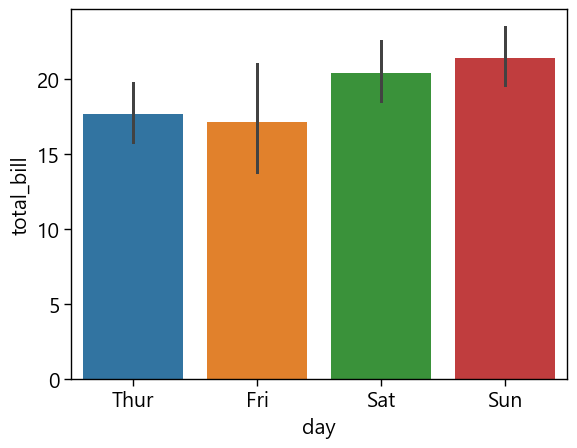

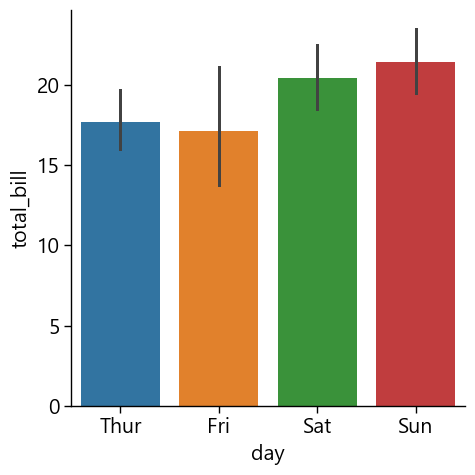

In [33]:
sns.barplot(x='day', y= 'total_bill', data=tips)
# 또는
sns.catplot(x='day', y='total_bill', kind='bar', data=tips)

수평 요약 막대그래프
 - 만일 요약 막대그래프를 수평으로 그리고 싶다면 sns.barplot 함수에 orient='h' 옵션을 추가하면 됩니다.

<Axes: xlabel='total_bill', ylabel='day'>

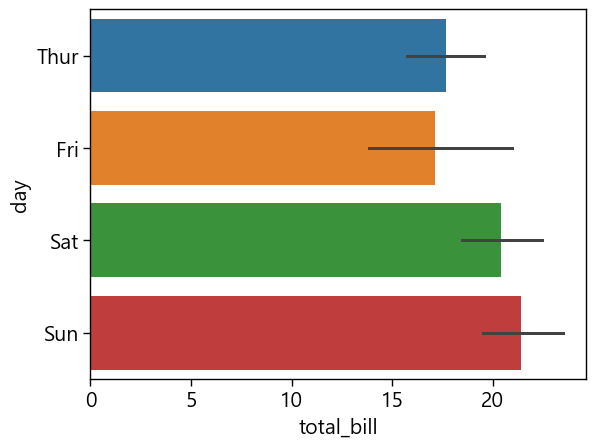

In [34]:
sns.barplot(x='total_bill', y='day', orient='h', data= tips)

- 다중 요약 막대 그래프
  - sns.barplot 함수에 hue 파라미터를 추가하면 평균을 나타내는 다중 막대그래프를 그릴 수 있습니다.
- 수직 다중 요약 그래프
  - 다음은 변량이 3개인 데이터를 수직 다중 요약 막대그래프로 표현하는 예시 코드입니다.

<Axes: xlabel='day', ylabel='total_bill'>

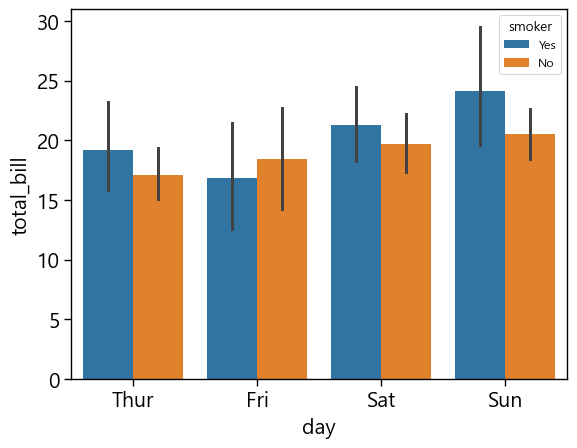

In [35]:
sns.barplot(x='day', y='total_bill', hue= 'smoker', data=tips)

- 수평 다중 요약 막대그래프
  - 수평 다중 요약 막대그래프를 그리고 싶으면 orient=h 파라미터 값을 추가하면 됩니다

<Axes: xlabel='total_bill', ylabel='day'>

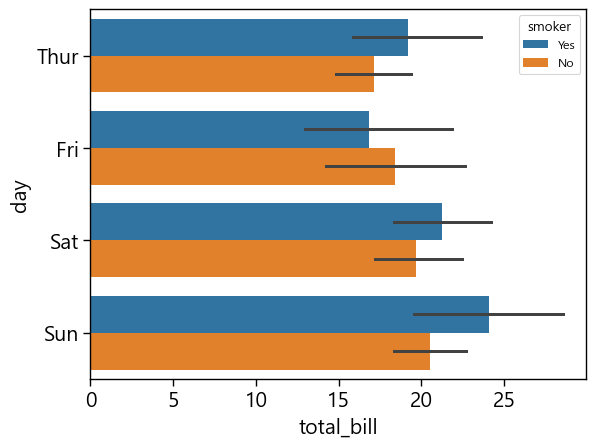

In [36]:
sns.barplot(y='day', x='total_bill', orient='h', hue= 'smoker', data=tips)

- 누적 요약 막대그래프
  - 누적 요약 막대그래프를 그리고 싶다면 sns.barplot 함수에 dodge=False를 추가하면 됩니다.  
Seaborn에서 누적 막대그래프는 평균 값을 나타내는 막대의 최대값 위에 다른 평균 값을 나타내는 막대를 쌓아서  
만드는 것이 아니라, 그래프 자체를 서로 겹쳐서 그린 것 입니다.

<Axes: xlabel='day', ylabel='total_bill'>

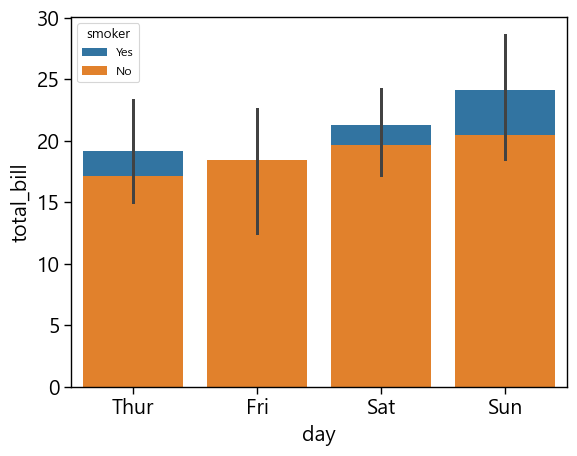

In [37]:
sns.barplot(x='day', y='total_bill', hue='smoker', dodge=False, data=tips)

- 누적 요약 막대그래프는 sns.barplot 함수를 연이어 사용해서 그릴 수도 있습니다.

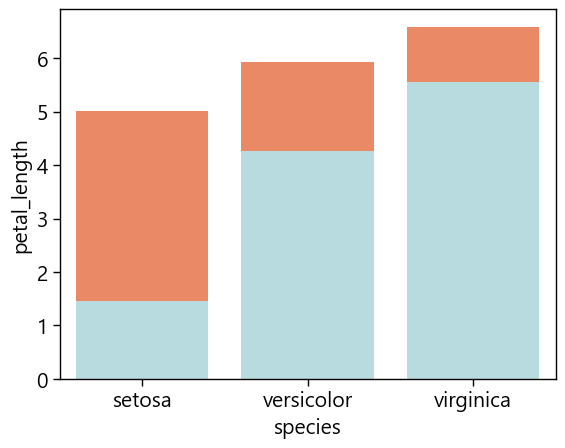

In [38]:
iris = sns.load_dataset('iris')
s1 = sns.barplot(x='species', y='sepal_length',
                 color = 'coral', ci=None, data=iris)
s2 = sns.barplot(x='species', y='petal_length',
                 color ='powderblue', ci=None, data=iris)

# 그래프에서 막대의 y축값(색칠된 부분)은 각각 sepal_length의 평균과 petal_length의 평균을 나타냅니다

4) 포인트 plot
- sns.barplot을 이용해 그린 그래프에서는 평균을 막대로 표시했습니다.  
    만일 평균값을 점으로 표현하고 평균에 대한 95% 신뢰구간을 나타내고 싶다면 sns.ponitplot함수를 이용할 수 있습니다.

<Axes: xlabel='day', ylabel='total_bill'>

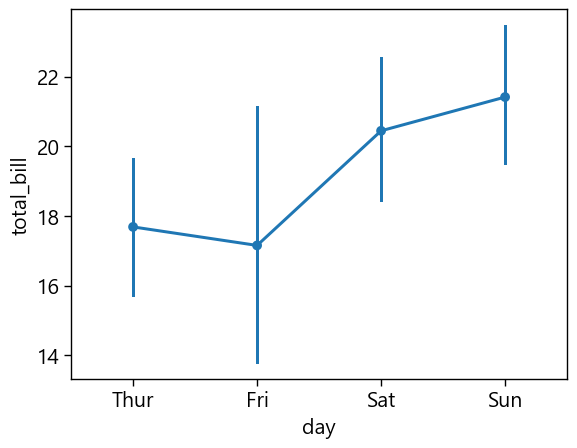

In [39]:
sns.pointplot(x='day', y='total_bill', data=tips)
# 또는
# sns.catplot(x='day', y='total_bill', kind='point', data= tips)
# 세로줄은 컨피던스 인터벌(신뢰구간)

- 만일 신뢰구간이 아니라 표준편차를 표현하고 싶다면 ci='sd'를 추가하면 됩니다.  
    선과 포인트를 다른 모양으로 표현할 수도 있습니다. 예시는 다음과 같습니다.

<Axes: xlabel='class', ylabel='survived'>

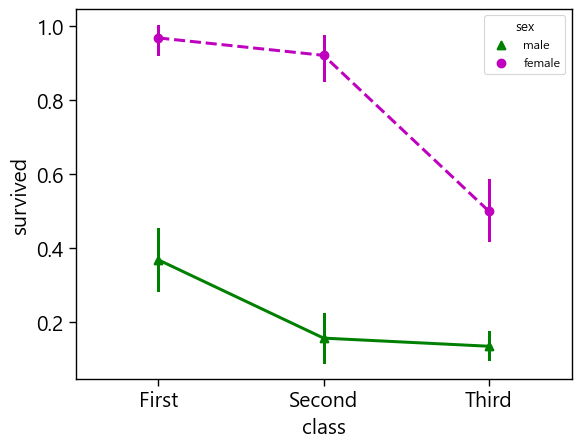

In [40]:
titanic = sns.load_dataset('titanic')
sns.pointplot(x='class',y='survived', hue='sex',
              palette={'male':'g','female':'m'},
              markers=['^','o'], #마커지정
              linestyles=['-','--'], #선 스타일 지정
              data = titanic)

- 지금까지 sns.barplot 함수와 sns.pointplt 함수를 이용해 요약 통계값을 표현하는 그래프를 만들어 보았습니다.  
만일 자료의 요약값이 아니라 자료의 실제값을 등급에 따라 분류해 각 등급의 빈도수로 나타내고 싶다면 히스토그램(histogram)을 이용하면 됩니다.

5) 히스토그램(histogram)
- Seaborn에서 히스토그램을 만드는 함수는 sns.hisplot 입니다. sns.displot 함수를 이용해도 됩니다.  
Seaborn에서 sns.hisplot 함수로 이변량 히스토그램(bivariate histogaram)을 그릴 때는 변량을 색상으로 구분합니다.  
여기서는 sns.histplot 대신 sns.displot을 이용해 히스토그램을 만들어 보겠습니다.

기본 히스토그램

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

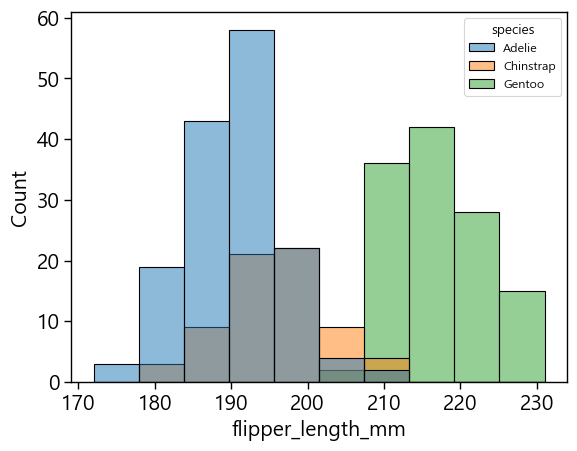

In [41]:
penguins = sns.load_dataset('penguins')
sns.histplot(x='flipper_length_mm', hue='species', data=penguins)
# 또는
# sns.displot(x='flipper_length_mm', hue='species', data= penguins)

옵션을 이용하면 다양한 종류의 히스토그램을 그릴 수 있습니다.  
hue : 그룹별 히스토그램  
multiple= 'stack' : 누적 히스토그램  
multiple= 'dodge' : 다중 히스토그램

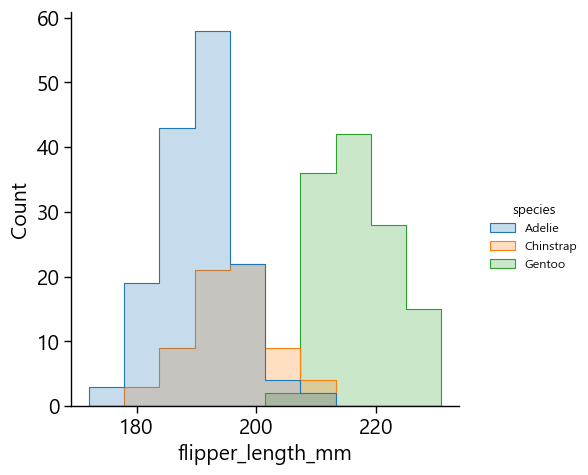

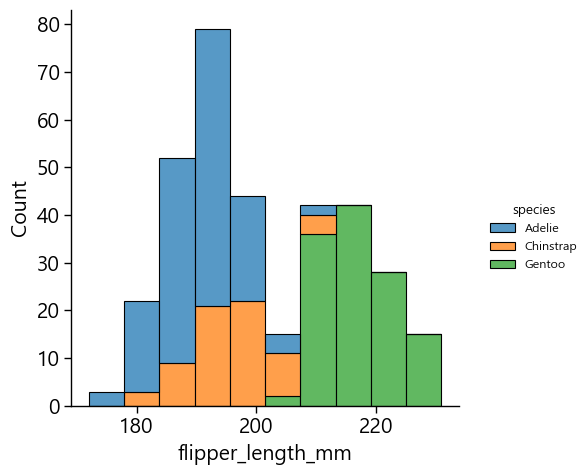

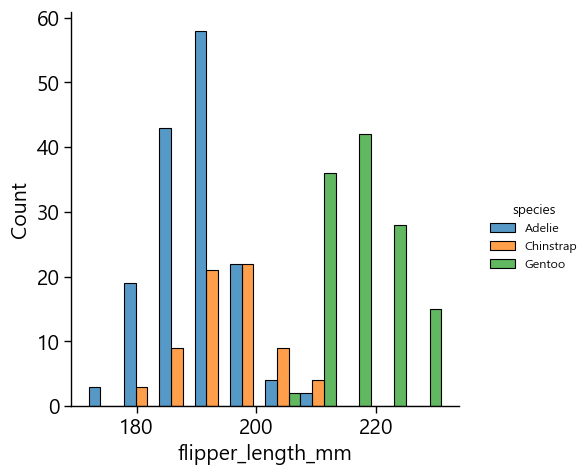

In [42]:
sns.displot(x='flipper_length_mm', hue='species', element='step', data=penguins)
sns.displot(x='flipper_length_mm', hue='species', multiple='stack', data=penguins)
sns.displot(x='flipper_length_mm', hue='species', multiple='dodge', data=penguins)

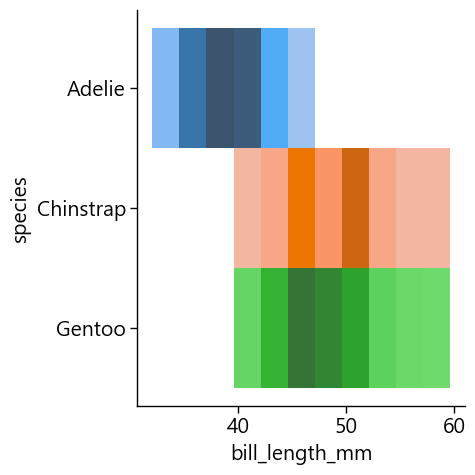

In [43]:
sns.displot(x='bill_length_mm', y='species', hue='species', 
            legend=False, data=penguins)

- log_scale=True : x축 값 로그 스케일로 변환
- element='poly' : 그래프를 분포다각형(distribution ploygon)으로 지정
- fill=False : 그래프 선 아래 색깔 채우지 않기

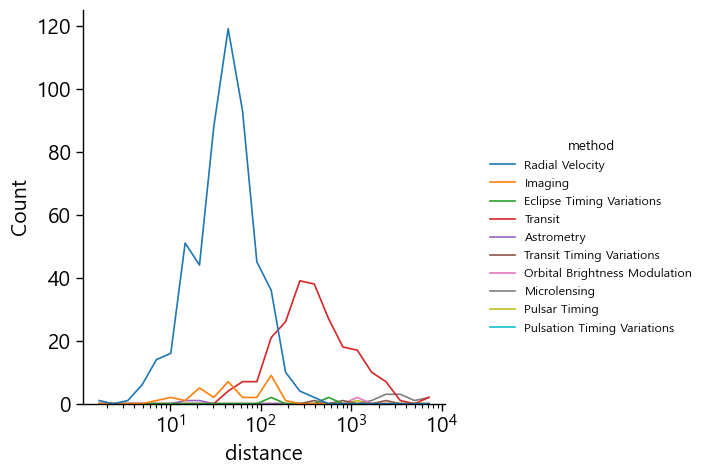

In [44]:
planets = sns.load_dataset("planets")
sns.displot(x='distance', hue='method', log_scale=True, 
            element='poly', fill=False, data=planets)

- 한 캔버스 내에 여러 그래프를 그리지 않고, 그래프를 서로 다른 캔버스에 나누어서 그리고 싶다면  
col 옵션을 사용하면 됩니다. col 옵션은 그래프를 개별 캔버스에 나누어 그려줍니다.

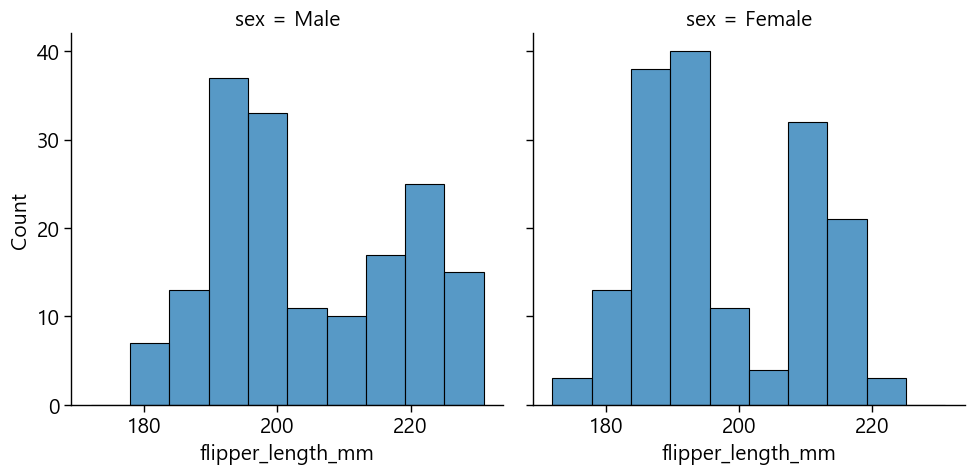

In [45]:
sns.displot(x='flipper_length_mm',
            col='sex', # 성별에 따라 캔버스 구분
            data=penguins)

- 만일 두 변량이 모두 수치형이라면 이변량 히스토그램은 히트맵(heatmap) 같은 모양을 띠게 됩니다.  
binwidth: 직사각형 크기 지정  
cbar: 색 집중도에 따른 빈도수를 나타내는 컬러바 유무 지정  
hue: 색으로 구분되는 그룹별 그래프 설정(분포 간 중복되는 부분이 적어야 함)

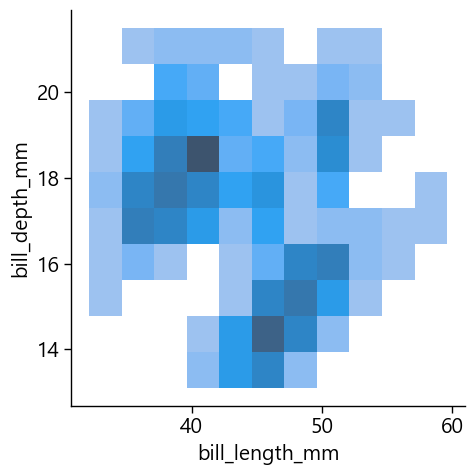

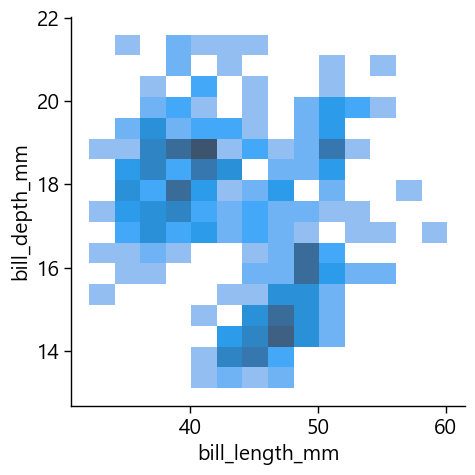

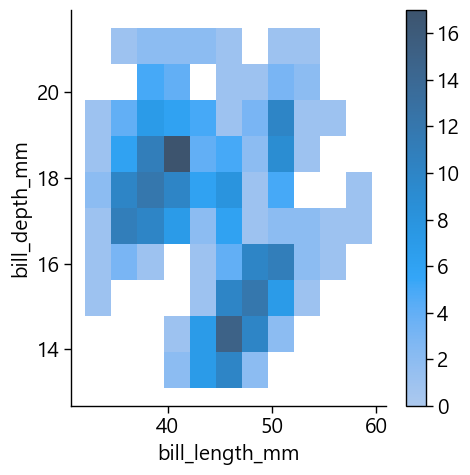

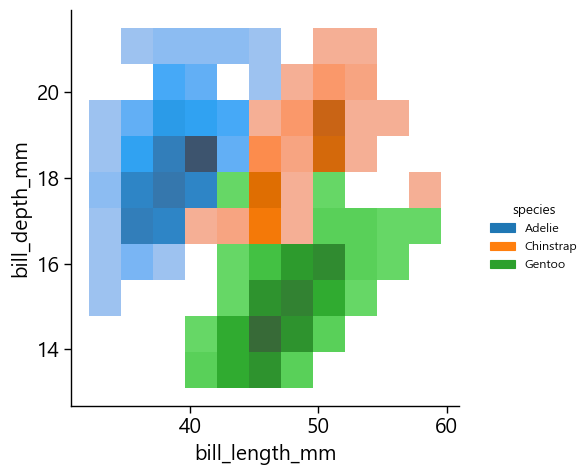

In [46]:
# 코드1: 2차원 - 기본
sns.displot(x='bill_length_mm', y='bill_depth_mm', 
            data=penguins)

# 코드2: 2차원 - 직사각형 넓이 조정
sns.displot(x='bill_length_mm', y='bill_depth_mm', binwidth=(2, .5), 
            data=penguins)

# 코드3: 2차원 - 컬러바 유무 지정
sns.displot(x='bill_length_mm', y='bill_depth_mm', cbar=True, 
            data=penguins)

# 코드4: 3차원 - 그룹별 색으로 분류
sns.displot(x='bill_length_mm', y='bill_depth_mm', hue='species', 
            data=penguins)

bins: 등급 수 지정하기  
discrete: x축 라벨을 막대 중간에 위치시키기(True)  
pthresh: 전체 데이터 중에서 해당 비율(0~1)의 셀 투명 처리하기  
pmax: 포화도 최댓값(0~1) 지정하기

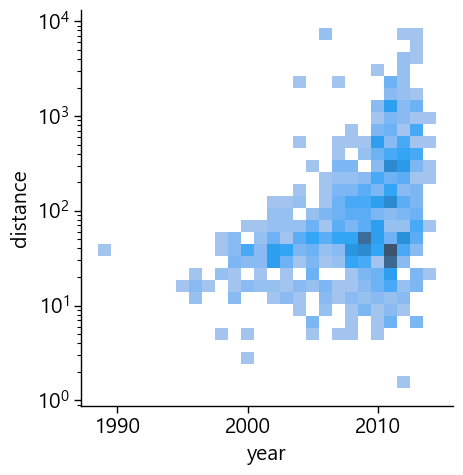

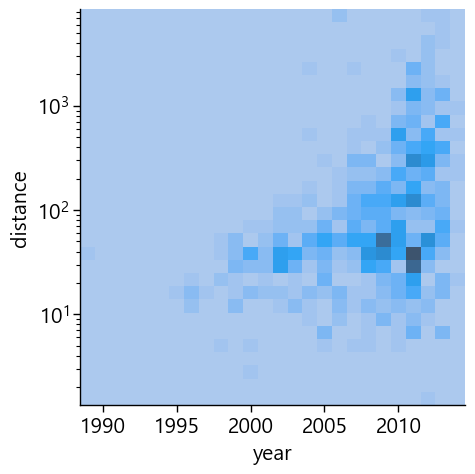

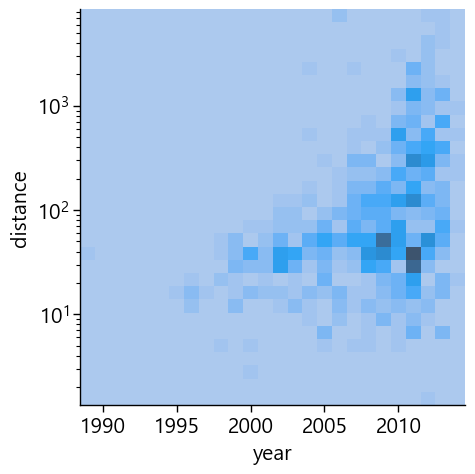

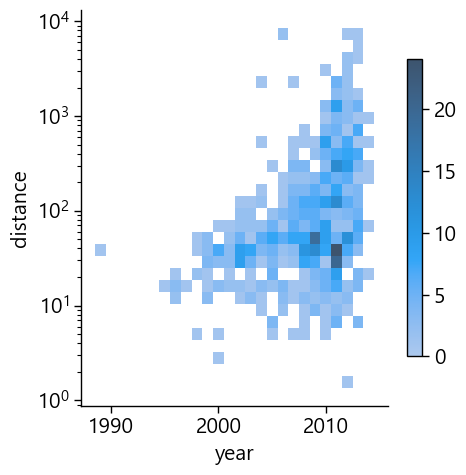

In [47]:
# 코드 1 : 튜플로 x와 y변수를 다르게 지정.
sns.displot(planets, x= 'year', y='distance',
            bins=30, discrete=(True,False),log_scale=(False, True))
# 코드 2 : 관측치가 없는 부분 색으로 표시 (투명하게 표시하지 않기.)
sns.displot(planets, x='year', y='distance',
            bins=30, discrete=(True,False),
            log_scale=(False,True),
            thresh=None)
# 코드 3 : 한계점과 포화도 지정
sns.displot(planets, x='year', y='distance',
            bins=30, discrete=(True,False),
            log_scale=(False,True),
            thresh=None, pmax=9)
# 코드 4 : 컬러 맵 추가
sns.displot(planets, x='year', y='distance',
            bins=30, discrete=(True,False),
            log_scale=(False,True),
            cbar=True, cbar_kws=dict(shrink=.75))

지금까지 여러 가지 옵션을 이용해 다양한 종류의 기본 히스토그램을 그려보았습니다.  
만일 그룹별로 관측수가 다른 히스토그램을 비교하고 싶다면, 기본 히스토그램을 정규화(normalization)하면 됩니다.  

정규화는 모든 데이터 포인트(data point)가 동일한 정도의 스케일(중요도)로 해석되도록 만드는 과정입니다.  
정규화는 모든 데이터 포인트의 중요도를 균등하게 만듭니다. 따라서, 이상치를 지닌 특정 속성이 전체 속성처럼 대표되는 일반화의 오류를 방지할 수 있습니다.  
정규화를 거친 히스토그램은 정규 히스토그램(normalized histogram)이 됩니다.

정규화를 위한 스케일링 기준점으로는 전체 관측수와 면적을 이용하는 방법이 있습니다. 먼저 전체 관측수로 정규화한 히스토그램을 만들어보겠습니다.

정규 히스토그램(전체 관측수) Seaborn에서 전체 관측수로 정규화한 히스토그램을 만들려면  
sns.histplot 함수 또는 sns.displot 함수에 stat='probability' 또는 stat='percent' 옵션을 추가하면 됩니다.  
stat 옵션에 probability 인자를 주면 y축이 확률(probability)인 그래프가 그려집니다. 반면, percent 옵션을 사용하면 y축이 백분율(percent)인 그래프가 만들어집니다.  
전자의 경우 막대들의 높이를 모두 더하면 1이 되고, 후자의 경우에는 100이 됩니다. 이 옵션을 추가면 각 등급의 빈도수를 전체 관측수로 나눈 정규 히스토그램을 만들 수 있습니다.  

예시 코드는 다음과 같습니다.

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

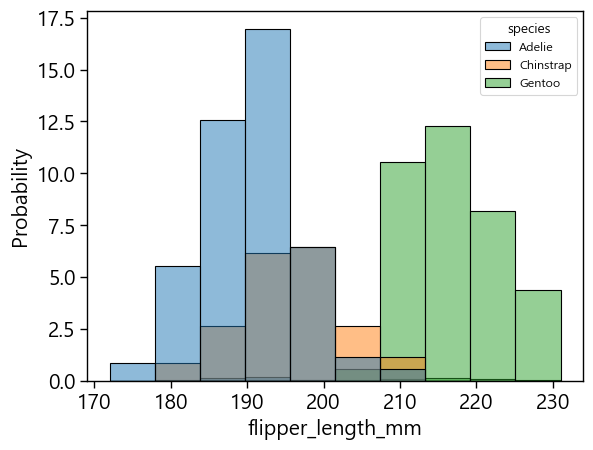

In [48]:
# 코드1: y축이 비율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='probability', data=penguins)

# 코드2: y축이 백분율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='percent', data=penguins)

이번에는 전체 관측수가 아니라 면적으로 정규화한 히스토그램을 만드는 법을 알아보겠습니다.

정규 히스토그램(면적)

Seaborn에서 면적으로 정규화한 정규 히스토그램을 만들려면 stat='density' 옵션을 이용하면 됩니다.  
이 옵션은 각 등급의 빈도수를 전체 관측치의 개수와 막대 너비(width)의 곱으로 나눈 정규 히스토그램을 만들어줍니다.  
이 히스토그램에서 y축은 밀도(density)가 되고, 각 막대의 넓이를 모두 더한 합은 1이 됩니다.  
만일, 독립적인 히스토그램을 그리고 싶다면 common_norms=False 옵션을 추가하면 됩니다.  

코드는 다음과 같습니다.

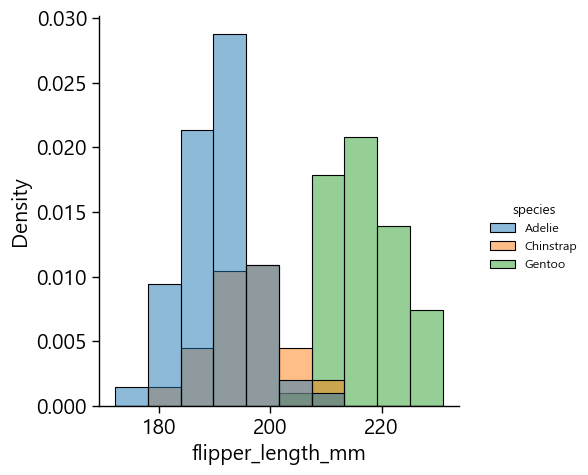

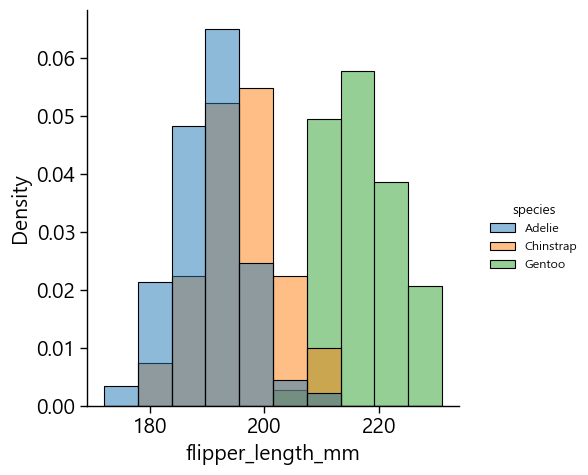

In [49]:
# 코드1: y축이 밀도인 정규 히스토그램
sns.displot(penguins, x='flipper_length_mm', hue='species', 
            stat='density') 

# 코드2: y축이 밀도인 개별 히스토그램
sns.displot(penguins, x='flipper_length_mm', hue='species', 
            stat='density',
            common_norm=False)

- 지금까지 Seaborn에서 기본 히스토그램과 2가지 종류의 정규 히스토그램을 만드는 법을 살펴보았습니다. 히스토그램은 직관적입니다.  
    히스토그램은 데이터의 분포를 빠르고 한눈에 파악하고 싶을 때 사용하면 좋습니다.

- 하지만 한계도 있습니다. 히스토그램으로 확률밀도함수(Probability Density Function, PDF)를 나타내면 정확하지 않습니다.  
    히스토그램에서 등급의 수는 아무리 많게 잡아도 유한하기 때문입니다.  
    확률밀도함수는 매끄러운 곡선인데 히스토그램의 등급은 불연속적이다보니 히스토그램의 모양도 계단과 같이 울퉁불퉁하게 나타납니다.

- 또한, 히스토그램에서는 등급의 간격과 데이터의 시작 위치에 따라 히스토그램의 모양이 달라집니다.  
    데이터의 차원(dimension)이 증가할수록 히스토그램으로 데이터의 분포를 분석하거나 모델을 추정하는데 필요한 표본 데이터의 개수도 기하급수적으로 증가한다는 단점도 있습니다.

- 이러한 히스토그램의 단점을 개선한 방법이 있습니다. 바로 커널밀도추정(Kernel Density Estimation, KDE)입니다.  
    지금부터는 커널밀도추정이란 무엇인지 그리고 Seaborn 라이브러리를 이용해 KDE 곡선을 그리는 법을 알아보겠습니다.

- 모수적 접근방법  
    샘플을 분석해서 모수를 맞춘다, 분석한다  
    모수적 방법은 데이터의 분포를 특정한 확률분포를 이용해 모델링하고, 모델의 파라미터를 추정하여 통계적 추론을 수행하는 방법입니다.  
    수적 방법은 일반적으로 적은 데이터로도 높은 정확도를 보이며, 분석 결과에 대한 설명이나 예측력을 높일 수 있습니다.  
    그러나 분포 모델링이 잘못되었을 경우 실제 분포와는 다른 결과를 도출할 수 있습니다.
    
    scipy.stats 모듈을 통해 구현할 수 있습니다.  
    예를 들어, t-검정은 scipy.stats.ttest_ind 함수를 이용하여 구현할 수 있습니다.  


- 비모수적 접근방법  
    모수적 접근 방법과 달리 샘플을 분석해도 모수를 맞추거나 분석할 수 없음(?)  
    비모수적 방법은 분포 모델링 없이 데이터의 순위 정보를 이용하여 분석을 수행하는 방법입니다.  
    비모수적 방법은 데이터의 분포나 모델에 대한 가정이 필요하지 않기 때문에 보다 유연하게 분석할 수 있습니다.   
    그러나 적은 데이터로는 정확한 결과를 보장하기 어렵고, 모델링을 통한 추가적인 설명력이 필요할 수 있습니다.
    
    scipy.stats 모듈과 statsmodels 패키지를 통해 구현할 수 있습니다.  
    예를 들어, 순위검정은 scipy.stats.ranksums 함수를 이용하여 구현할 수 있습니다.


6) 밀도그림  
커널밀도추정이란 커널 함수(kernel function)를 이용해서 확률변수의 확률밀도함수를 추정하는 비모수적(non-parametric) 통계 방법입니다.  
비모수적 방법이란 관측 데이터가 특정 확률분포를 따른다는 전제 없이 실시하는 검정 방법입니다.  
커널 함수란 원점을 중심으로 대칭을 이루고, 양의(non-negative) 실수(real-valued)값을 가지며, 적분값이 1인 함수(K)를 뜻합니다.  
커널 함수에는 대표적으로 가우시안(Gaussian), 코사인(cosine), Epanechnikov 함수 등이 있습니다.

- 밀도그림(density plot)은 커널 스무딩(kernel smoothing)을 이용해 추정한 히스토그램의 확률밀도함수입니다. KDE에서는 데이터를 커널 함수로 대치하여 히스토그램에서 나타났던 등급의 불연속성 문제를 해결합니다. KDE로 추정한 확률밀도함수는 부드러운 곡선입니다.

- 단, KDE 방법을 사용할 때는 조건이 있습니다. KDE 방법은 극단값이 없는 연속 자료에 사용합니다. 확률밀도함수는 부드러운 곡선인데 이상치가 있으면 해당 값에서 확률밀도함수가 뾰족한 모양을 띠게 되기 때문입니다. 이상치가 있는 연속 자료에는 KDE 보다는 히스토그램을 사용하는 것이 적합합니다.

- Seaborn에서 KDE 방법을 통해 확률밀도함수를 그리려면 sns.kdeplot을 이용하면 됩니다. sns.displot 함수에 kind='kde' 옵션을 주어도 됩니다. 이번에는 sns.displot 함수에 kind='kde' 옵션을 추가해서 그려보겠습니다.

multiple= 'stack' : 그래프 쌓아서 그리기  
multiple= 'fill' : 각 값에서 겹친 분포(stacked distribution) 정규화해서 그리기(단변량일 때만 유효, 모든 값에서 y축의 밀도가 1)  
fill= True : 그래프 불투명하게 그리기  
cumulative= True : 누적분포함수 그리기

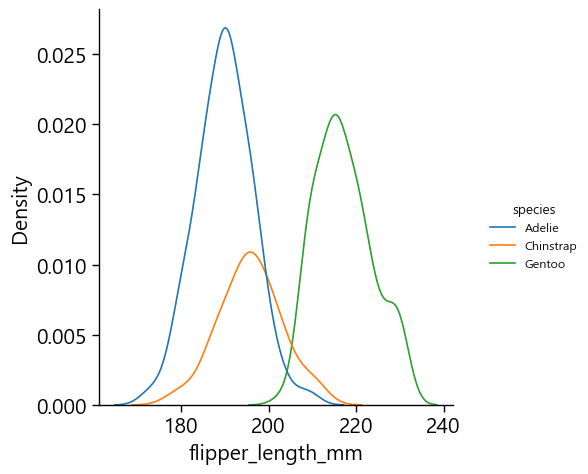

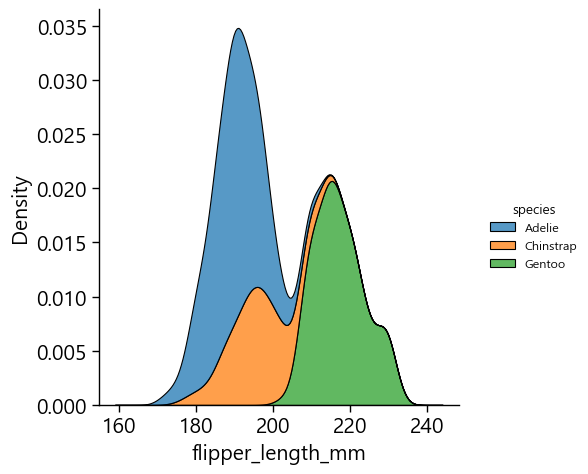

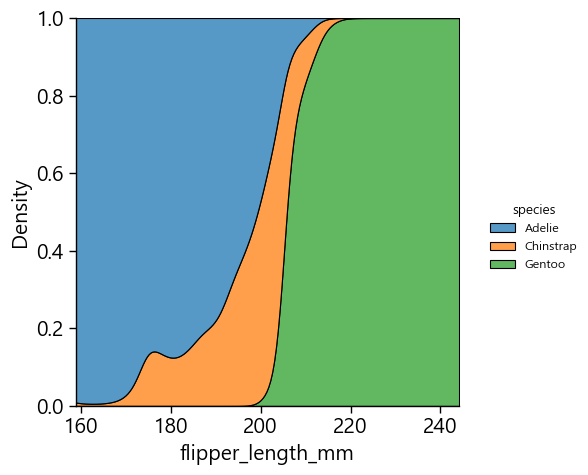

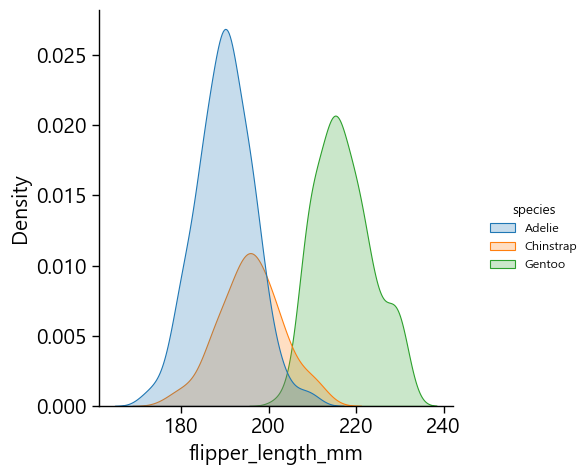

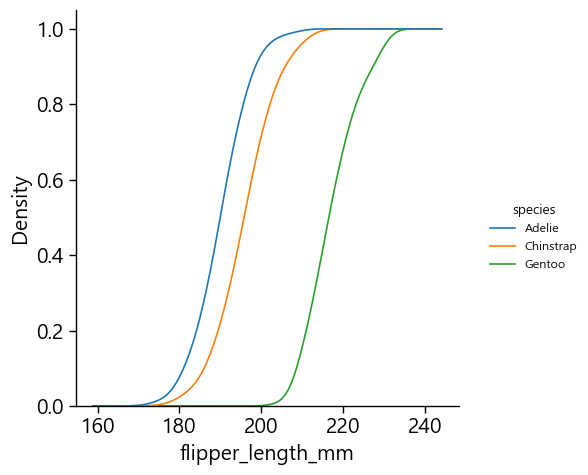

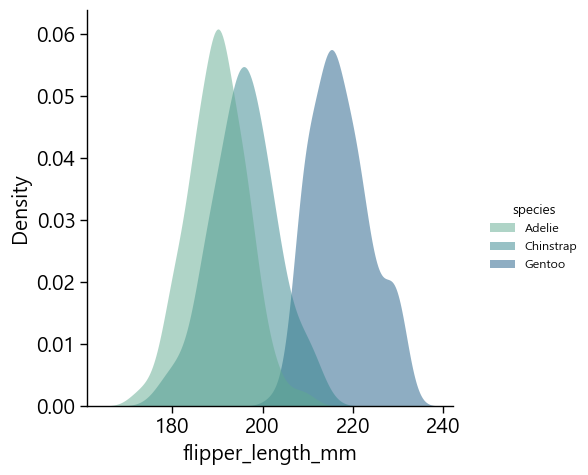

In [50]:
# 코드1: 기본 그래프
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species')

# 코드2: 그래프 겹쳐서 그리기
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species', 
            multiple='stack')

# 코드3: 모든 값에서 겹친 분포 정규화하기
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species',
            multiple='fill')

# 코드4: 그래프 불투명하게 그리기
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species', 
            fill=True) # sns.kdeplot에서는 shade=True도 사용 가능

# 코드5: 누적분포함수(Cumulative Distribution Function, CDF) 그리기
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species',
    cumulative=True, common_norm=False, common_grid=True)

# 코드6
sns.displot(penguins, x='flipper_length_mm', kind='kde', 
            hue='species',
            fill=True, common_norm=False, palette='crest',
            alpha=.5, linewidth=0)

이변량 KDE 그래프는 등고선(contours)으로 표현됩니다. 각 등고선은 밀도가 같은 지점(iso-proportions)을 이은 것입니다.  
thresh: 가장 낮은 레벨의 등고선 크기 조정  
levels: 등고선 개수 또는 모양

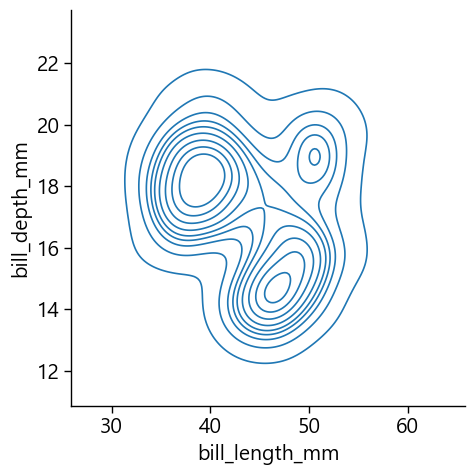

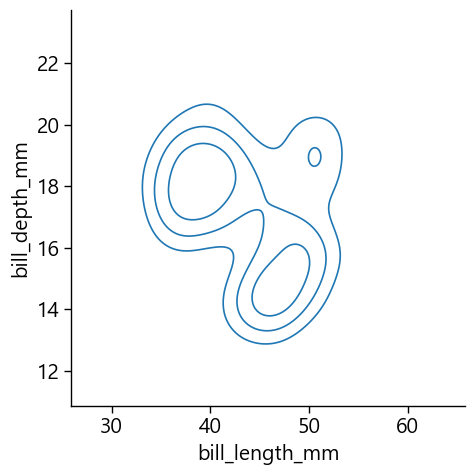

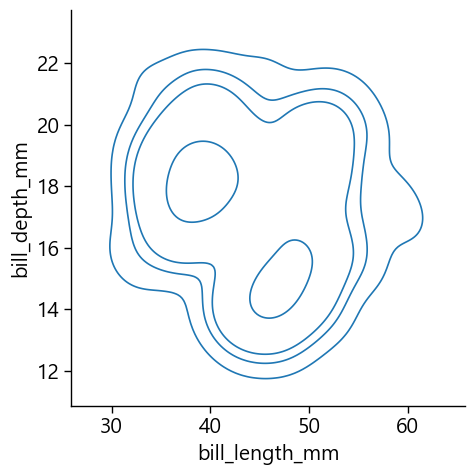

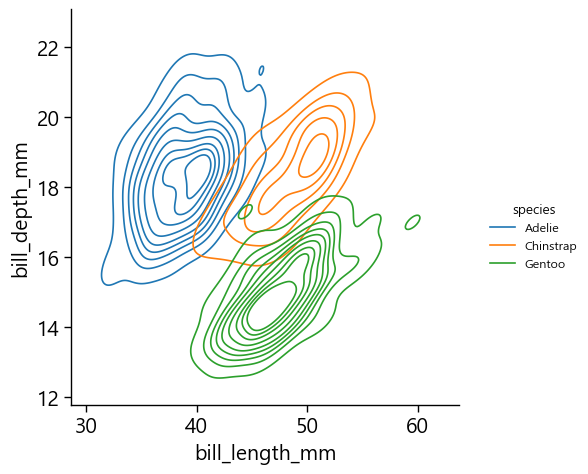

In [51]:
# 코드1: 2차원 - 기본 그래프
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde')

# 코드2: 2차원 - 등고선 크기 및 개수 조정
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde', 
            thresh=.2, levels=4)

# 코드3: 2차원 - 개별 등고선 크기 지정
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde', 
            levels=[.01, .05, .1, .7])

# 코드4: 3차원 - 그룹별 그래프 색으로 구분
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde', 
            hue='species') # fill=True 추가하면 등고선 안이 색으로 채워짐

8) 상자그림 (상자수염 그림)
- Seaborn에서 상자그림을 만들려면 sns.boxplot 함수를 이용하면 됩니다. sns.catplot 함수에 kind='box' 옵션을 추가해도 됩니다
- 전체 데이터의 범위를 상자로 나타내고, 중앙값은 상자 안의 가로줄로 표시하며, 상자 위 아래에는 상위 25%, 하위 25% 데이터를 표현하는 수염을 그립니다.  
이상치(outlier)는 상자 밖에 점으로 그려 표현할 수도 있습니다.  
Box plot은 데이터의 대략적인 분포와 이상치를 확인할 수 있어 많이 사용되는 그래프 중 하나입니다.

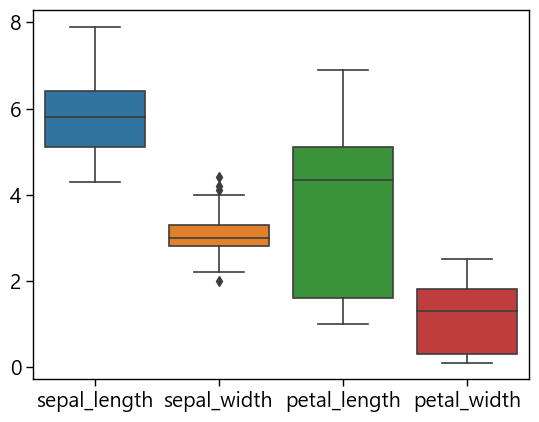

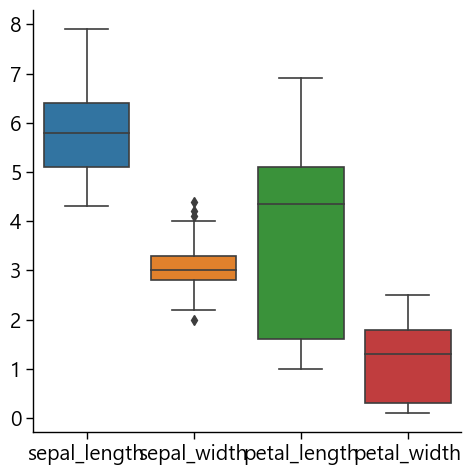

In [52]:
import seaborn
iris = sns.load_dataset('iris')
sns.boxplot(data=iris)
# 또는
sns.catplot(data=iris,kind='box')

- 만일 상자그림을 수평으로 그리고 싶다면 orient='h' 옵션을 추가하면 됩니다

<Axes: >

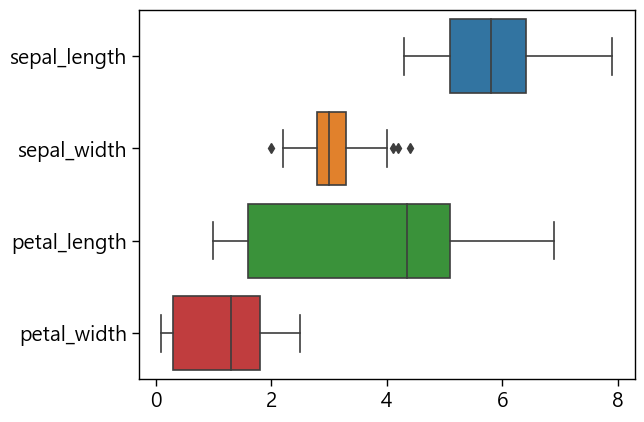

In [53]:
sns.boxplot(data=iris, orient='h')

- 3차원 boxplot은 hue 옵션을 추가해서 그릴 수 있습니다.  
    hue 파라미터를 더하면 비슷한 속성의 데이터끼리 분류할 수 있습니다.

<Axes: xlabel='total_bill', ylabel='day'>

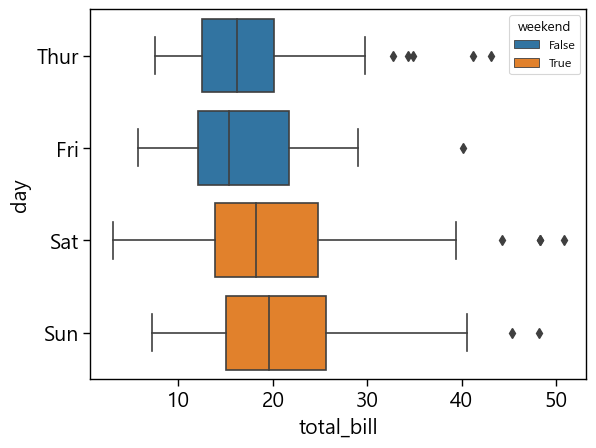

In [58]:
df_tips['weekend'] = tips['day'].isin(['Sat','Sun'])
sns.boxplot(x='total_bill',y = 'day',hue = 'weekend',
            orient='h',
            dodge=False,
            data=df_tips)

- 박슨 플롯
    박슨 플롯은 데이터를 여러 개의 분위로 나눈 박스플롯입니다.  
    박슨 플롯은 데이터셋을 더 많은 분위수(quantiles)로 나누어 기존의 상자그림보다 이상치(outliers)에 대해 더 많은 정보를 제공합니다.  
    따라서, 박슨 플롯은 큰 데이터셋을 처리하기에 적합합니다.

박슨 플롯을 만들려면 sns.boxenplot을 이용하면 됩니다.  
sns.catplot 함수에 kind='boxen' 옵션을 추가해도 됩니다.

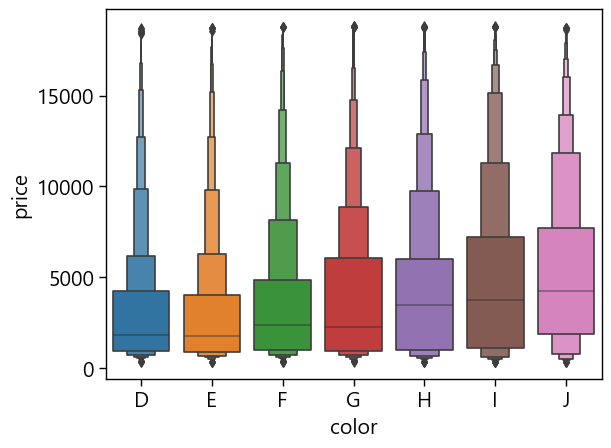

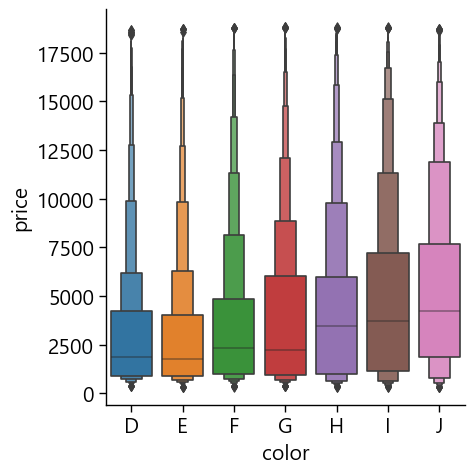

In [59]:
sns.boxenplot(x='color', y='price', 
              data=df_diamonds.sort_values('color'))

# 또는

sns.catplot(x='color', y='price', kind='boxen',
            data=df_diamonds.sort_values('color'))

- 바이올린 플롯
    바이올린 플롯은 상자그림과 KDE 방법을 이용해 추정한 확률 밀도 함수를 합친 그래프 입니다.
    Seaborn으로 바이올린 플롯을 그리고 싶다면 sns.violinplot 함수를 이용하면 됩니다.
    sns.catplot 함수에 kind='violin' 옵션을 추가해도 동일한 결과를 얻을 수 있습니다.

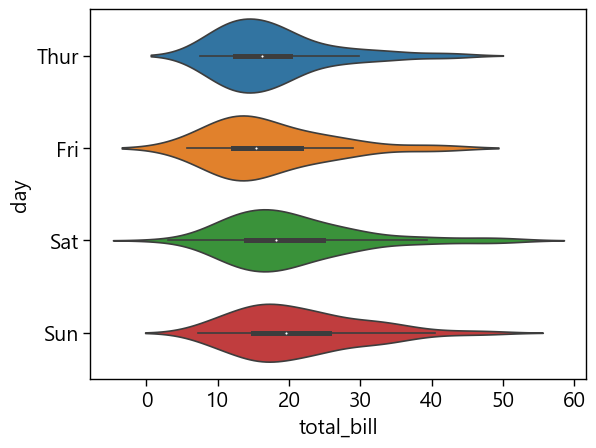

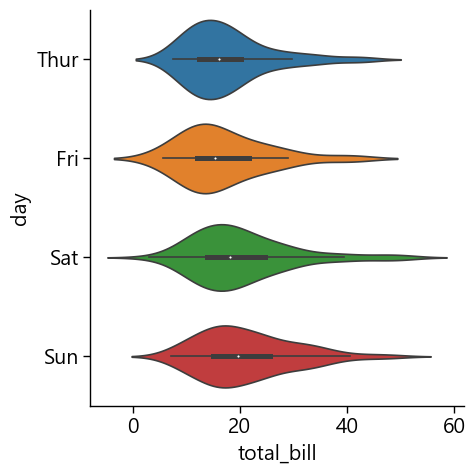

In [60]:
sns.violinplot(x= 'total_bill', y='day', data=df_tips)
# 또는
sns.catplot(x='total_bill', y='day', kind='violin', data=df_tips)